In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

In [6]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2022-11-10')

In [8]:
swissre = yf.download('SREN.SW', start=start, end=end)
swissre["Date"] = swissre.index
swissre = swissre[["Close"]]
swissre.reset_index(drop=True, inplace=True)

splk = yf.download('SPLK', start=start, end=end)
splk["Date"] = splk.index
splk = splk[["Close"]]
splk.reset_index(drop=True, inplace=True)

bitcoin = yf.download('BTC-USD', start=start, end=end)
bitcoin["Date"] = bitcoin.index
bitcoin = bitcoin[["Close"]]
bitcoin.reset_index(drop=True, inplace=True)

data = pd.concat([swissre, splk,bitcoin], axis=1)
data = data[['Close']]
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close,Close,Close
0,109.250000,151.979996,7200.174316
1,108.349998,152.059998,6985.470215
2,108.300003,154.460007,7344.884277
3,108.449997,153.410004,7410.656738
4,108.650002,155.759995,7411.317383
...,...,...,...
1039,NaN,NaN,21282.691406
1040,NaN,NaN,20926.486328
1041,NaN,NaN,20602.816406
1042,NaN,NaN,18541.271484


In [9]:
splk,swissre,bitcoin

(          Close
 0    151.979996
 1    152.059998
 2    154.460007
 3    153.410004
 4    155.759995
 ..          ...
 716   74.610001
 717   72.029999
 718   73.580002
 719   75.040001
 720   71.889999
 
 [721 rows x 1 columns],
           Close
 0    109.250000
 1    108.349998
 2    108.300003
 3    108.449997
 4    108.650002
 ..          ...
 719   74.180000
 720   75.320000
 721   74.480003
 722   74.860001
 723   76.400002
 
 [724 rows x 1 columns],
              Close
 0      7200.174316
 1      6985.470215
 2      7344.884277
 3      7410.656738
 4      7411.317383
 ...            ...
 1039  21282.691406
 1040  20926.486328
 1041  20602.816406
 1042  18541.271484
 1043  15880.780273
 
 [1044 rows x 1 columns])

In [10]:
aapl = data.iloc[:, 0]
meta = data.iloc[:, 1]
twtr = data.iloc[:, 2]

In [11]:
#Mean daily return
mean_daily_ret = data.pct_change(1).mean()
corr = data.pct_change(1).corr()
corr #no multi colinearity 

,Close,Close,Close
Close,1.000000,-0.009788,0.030777
Close,-0.009788,1.000000,-0.002308
Close,0.030777,-0.002308,1.000000


differenze between arithmetic and log returns: https://chandlerfang.com/2017/01/09/arithmetic-vs-logarithmic-rates-of-return/

In [37]:
#arithmetic return
arith_ret = data.pct_change(-1).dropna()
#log_ret
log_ret = np.log(data/data.shift(-1)).dropna()
arith_ret,log_ret

(         Close     Close     Close
 0     0.008306 -0.000526  0.030736
 1     0.000462 -0.015538 -0.048934
 2    -0.001383  0.006844 -0.008875
 3    -0.001841 -0.015087 -0.000089
 4     0.007885  0.008025 -0.046067
 ...        ...       ...       ...
 1038  0.000000  0.000000 -0.006365
 1039  0.000000  0.000000  0.017022
 1040  0.000000  0.000000  0.015710
 1041  0.000000  0.000000  0.111187
 1042  0.000000  0.000000  0.167529
 
 [1043 rows x 3 columns],
         Close     Close     Close
 0    0.008272 -0.000526  0.030273
 1    0.000462 -0.015660 -0.050172
 2   -0.001384  0.006821 -0.008915
 3   -0.001843 -0.015202 -0.000089
 4    0.007854  0.007993 -0.047161
 ..        ...       ...       ...
 715  0.013617  0.028409  0.031180
 716 -0.004292  0.035192 -0.013899
 717  0.005368 -0.021291  0.003031
 718  0.001886 -0.019648 -0.003703
 719 -0.015251  0.042884 -0.042929
 
 [720 rows x 3 columns])

In [38]:
#covariance of log returns
cov_log_ret = log_ret.cov()
cov_log_ret

,Close,Close,Close
Close,0.000429,-0.000007,0.000037
Close,-0.000007,0.001259,0.000003
Close,0.000037,0.000003,0.001701


### Optimization (Randomization)

In [39]:
print('The stocks are: ',data.columns)

np.random.seed(200)
weights = np.array(np.random.random(len(data.columns)))
weights = weights/np.sum(weights)
print('Random weights: ',weights)

The stocks are:  Index(['Close', 'Close', 'Close'], dtype='object')
Random weights:  [0.53580931 0.12809422 0.33609646]


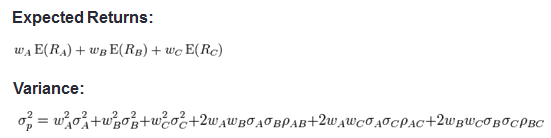

In [40]:
## Finding expected return 
expected_return = np.sum((log_ret.mean()* weights) * 252) #252 trading days
expected_return

-0.1221309411632048

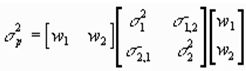

In [41]:
## Finding expected variance
expected_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
expected_vol



0.29641001721950555

In [42]:
sharpe_r = expected_return/expected_vol
sharpe_r

-0.4120337845153226

In [43]:
#Iterration of random wheights to find the Sharpe Ratio
np.random.seed(200)

# Initalization of variables
np.random.seed(200)
portfolio_number = 7000
weights_total = np.zeros((portfolio_number,len(data.columns)))
returns = np.zeros(portfolio_number)
volatility = np.zeros(portfolio_number)
sharpe = np.zeros(portfolio_number)
for i in range(portfolio_number):
        # Random weights
        weights = np.array(np.random.random(3))
        weights = weights/np.sum(weights)
        # Append weight
        weights_total[i,:] = weights        # Expected return
        returns[i] = np.sum((log_ret.mean()* weights) * 252)        # Expected volume
        volatility[i] = np.sqrt(np.dot(weights.T,
        np.dot(log_ret.cov()*252,weights)))        # Sharpe ratio
        sharpe[i] = returns[i]/volatility[i]
        
        
        



In [44]:
max_sharpe = sharpe.max()
max_sharpe

0.6118161701297993

In [45]:
max_sharpe_index = sharpe.argmax()
max_sharpe_index

2017

In [46]:
max_sharpe_weights = weights_total[max_sharpe_index,:]
max_sharpe_weights

array([5.67399474e-01, 4.32077973e-01, 5.22552605e-04])

In [47]:
max_sharpe_return = returns[max_sharpe_index]
max_sharpe_return

0.18671421362000198

In [48]:
max_sharpe_vol = volatility[max_sharpe_index]
max_sharpe_vol

0.30518025304952273

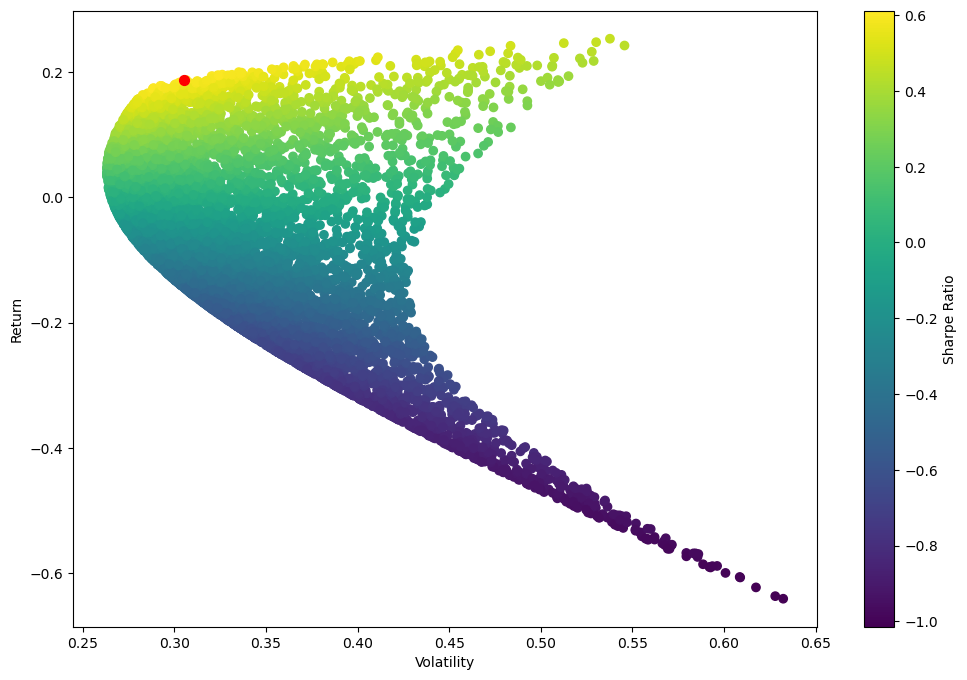

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(volatility,returns,c=sharpe)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sharpe_vol,max_sharpe_return,c='red',s=50)

### Optimization method — Mathematical

In [50]:
def stats(weights):
        weights = np.array(weights)
        expected_return = np.sum((log_ret.mean()* weights) * 252)
        expected_vol = np.sqrt(np.dot(weights.T, 
        np.dot(log_ret.cov()*252,weights)))
        sharpe_r = expected_return/expected_vol
        return np.array([expected_return,expected_vol,sharpe_r])

In [51]:
from scipy.optimize import minimize

The optimization idea is to minimize the negative Sharpe ratio. So a function is created which negates the Sharpe ratio obtained using the function created above.

In [52]:
def sr_negate(weights):
        neg_sr = stats(weights)[2] * -1
        return neg_sr

In [53]:
def weight_check(weights):
        weights_sum = np.sum(weights)
        return weights_sum - 1

In [54]:
constraints = ({'type':'eq','fun':weight_check})
bounds = ((0,1),(0,1),(0,1))
initial_guess = [0.3,0.3,0.4]

In [55]:
results = minimize(sr_negate,initial_guess,method='SLSQP',
    bounds=bounds,constraints=constraints)
results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.6138451851886578
       x: [ 5.938e-01  4.062e-01  2.864e-16]
     nit: 7
     jac: [-7.311e-05  1.068e-04  2.281e+00]
    nfev: 30
    njev: 7

In [56]:
wt = results.x
wt, stats(wt)


(array([5.93752982e-01, 4.06247018e-01, 2.86430416e-16]),
 array([0.18372688, 0.29930491, 0.61384519]))

In [57]:
frontier_return = np.linspace(-0.6,0.4,200)
def min_vol(weights):
        vol = stats(weights)[1]
        return vol

In [58]:
frontier_volatility = []
for exp_return in frontier_return:
        constraints = ({'type':'eq','fun':weight_check},{'type':'eq','fun':lambda x: stats(x)[0]-exp_return})
        result = minimize(min_vol,initial_guess,method='SLSQP',
        bounds=bounds,constraints=constraints)
        frontier_volatility.append(result['fun'])

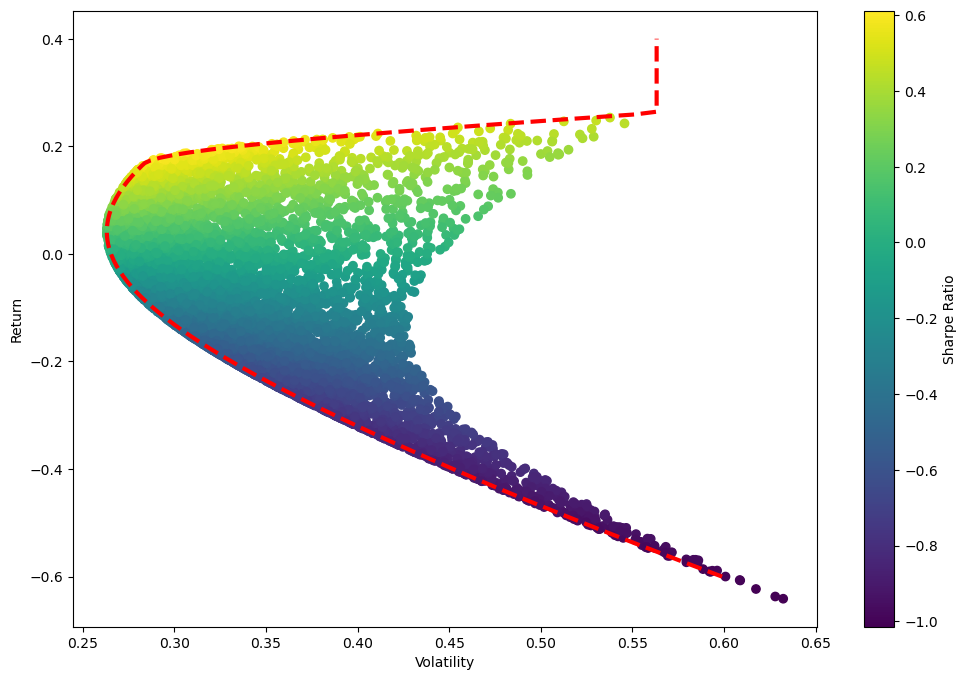

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(volatility,returns,c=sharpe)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_return,'r--',linewidth=3)

The efficient frontier tells us that for each desired level of volatility what the best possible return is that can be obtained.